In [1]:
import pandas as pd
import matplotlib.pyplot as plt

homelessness = pd.read_csv('E:/DQLab/Dataset/Datacamp/homelessness.csv', sep=';')
print(homelessness.head())

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama       2570.0           864.0    4887681
1             Pacific      Alaska       1434.0           582.0     735139
2            Mountain     Arizona       7259.0          2606.0    7158024
3  West South Central    Arkansas       2280.0           432.0    3009733
4             Pacific  California     109008.0         20964.0   39461588


In [2]:
# Print information and dimention dataframe homelessness  
print(homelessness.info(memory_usage=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)None


In [3]:
print(homelessness.shape)

(51, 5)


In [4]:
# Print a description of homelessness
print(homelessness.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


In [5]:
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values("individuals")

# Print the top few rows
print(homelessness_ind.head())

                region         state  individuals  family_members  state_pop
50            Mountain       Wyoming        434.0           205.0     577601
34  West North Central  North Dakota        467.0            75.0     758080
7       South Atlantic      Delaware        708.0           374.0     965479
39         New England  Rhode Island        747.0           354.0    1058287
45         New England       Vermont        780.0           511.0     624358


In [6]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)

# Print the top few rows
print(homelessness_fam.head())

                region          state  individuals  family_members  state_pop
32        Mid-Atlantic       New York      39827.0         52070.0   19530351
4              Pacific     California     109008.0         20964.0   39461588
21         New England  Massachusetts       6811.0         13257.0    6882635
9       South Atlantic        Florida      21443.0          9587.0   21244317
43  West South Central          Texas      19199.0          6111.0   28628666


In [7]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending=[True, False])

# Print the top few rows
print(homelessness_reg_fam.head())

                region      state  individuals  family_members  state_pop
13  East North Central   Illinois       6752.0          3891.0   12723071
35  East North Central       Ohio       6929.0          3320.0   11676341
22  East North Central   Michigan       5209.0          3142.0    9984072
49  East North Central  Wisconsin       2740.0          2167.0    5807406
14  East North Central    Indiana       3776.0          1482.0    6695497


In [8]:
# Select the individuals column
individuals = homelessness["individuals"]

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [9]:
# Select the state and family_members columns
state_fam = homelessness[["state", "family_members"]]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [10]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[["state", "individuals"]]

# Print the head of the result
print(ind_state.head())

        state  individuals
0     Alabama       2570.0
1      Alaska       1434.0
2     Arizona       7259.0
3    Arkansas       2280.0
4  California     109008.0


In [11]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]

# See the result
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California     109008.0         20964.0   39461588
9       South Atlantic     Florida      21443.0          9587.0   21244317
32        Mid-Atlantic    New York      39827.0         52070.0   19530351
37             Pacific      Oregon      11139.0          3337.0    4181886
43  West South Central       Texas      19199.0          6111.0   28628666
47             Pacific  Washington      16424.0          5880.0    7523869


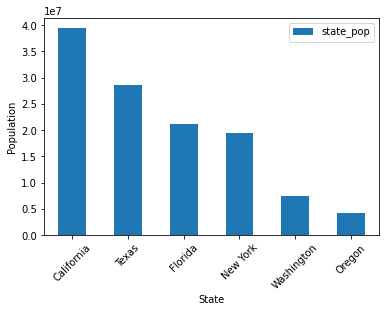

In [12]:
ind_gt_10k.sort_values(by='state_pop', ascending=False).plot(kind='bar', x='state', y='state_pop')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness["region"] == "Mountain"]

# See the result
print(mountain_reg)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
5   Mountain    Colorado       7607.0          3250.0    5691287
12  Mountain       Idaho       1297.0           715.0    1750536
26  Mountain     Montana        983.0           422.0    1060665
28  Mountain      Nevada       7058.0           486.0    3027341
31  Mountain  New Mexico       1949.0           602.0    2092741
44  Mountain        Utah       1904.0           972.0    3153550
50  Mountain     Wyoming        434.0           205.0     577601


In [14]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


In [15]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness["region"] == "South Atlantic") | (homelessness["region"] == "Mid-Atlantic")]

# See the result
print(south_mid_atlantic)

            region                 state  individuals  family_members  \
7   South Atlantic              Delaware        708.0           374.0   
8   South Atlantic  District of Columbia       3770.0          3134.0   
9   South Atlantic               Florida      21443.0          9587.0   
10  South Atlantic               Georgia       6943.0          2556.0   
20  South Atlantic              Maryland       4914.0          2230.0   
30    Mid-Atlantic            New Jersey       6048.0          3350.0   
32    Mid-Atlantic              New York      39827.0         52070.0   
33  South Atlantic        North Carolina       6451.0          2817.0   
38    Mid-Atlantic          Pennsylvania       8163.0          5349.0   
40  South Atlantic        South Carolina       3082.0           851.0   
46  South Atlantic              Virginia       3928.0          2047.0   
48  South Atlantic         West Virginia       1021.0           222.0   

    state_pop  
7      965479  
8      701547  
9 

In [16]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# See the result
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


In [17]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

# See the result
print(homelessness.head())

               region       state  individuals  family_members  state_pop  \
0  East South Central     Alabama       2570.0           864.0    4887681   
1             Pacific      Alaska       1434.0           582.0     735139   
2            Mountain     Arizona       7259.0          2606.0    7158024   
3  West South Central    Arkansas       2280.0           432.0    3009733   
4             Pacific  California     109008.0         20964.0   39461588   

      total  p_individuals  
0    3434.0       0.748398  
1    2016.0       0.711310  
2    9865.0       0.735834  
3    2712.0       0.840708  
4  129972.0       0.838704  


In [18]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


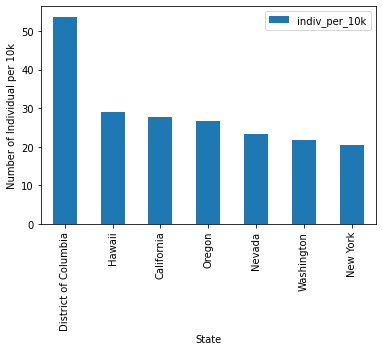

In [19]:
result.plot(x='state', y='indiv_per_10k', kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Individual per 10k')
plt.show()